This code is to visualize the spectral library results   
Owner: Susan Meerdink   
Creation Date: 10/12/17  


In [1]:
# Import Functions
import numpy as np
import matplotlib.pyplot as plt
import glob

In [8]:
# Read in vegetation spectra
directory = "F:\\Dropbox\\Analysis\\ECOSTRESS Spectral Library\\Input Spectral Library Files\\"

specASD = np.array(np.arange(0.35, 2.5001, 0.001))
specNic = np.array(np.arange(0, 1737, 1))

# Read through ASD spectra files
for file in glob.glob(directory + "*Spectra_ASD.csv"):
    if 'Misc' not in file:
        print(file)
        temp = np.loadtxt(file, delimiter=",", skiprows=1, usecols=np.arange(1,2152))
        specASD = np.vstack((specASD, temp))

# Read through Nicolet spectra files
for file in glob.glob(directory + "*Spectra_Nicolet.csv"):
    wave = np.loadtxt(file, delimiter=",", usecols=np.arange(1,1737))
    
    if 'Misc' not in file:
        print(file)
        temp = np.loadtxt(file, delimiter=",", skiprows=1, usecols=np.arange(1,1737))
        specNic = np.vstack((specNic, temp))

for file in glob.glob(directory + 'HyspIRI_Metadata.csv'):
    inFile = open(filename, 'r')  # Open ASD spectra file
    meta = inFiles.readlines()

specASD = np.delete(specASD, 0, 0)
specNic = np.delete(specNic, 0, 0)
specNic[specNic==-9999] = np.nan

F:\Dropbox\Analysis\ECOSTRESS Spectral Library\Input Spectral Library Files\Harvard_Spectra_ASD.csv
F:\Dropbox\Analysis\ECOSTRESS Spectral Library\Input Spectral Library Files\Huntington_Gardens_Spectra_ASD.csv
F:\Dropbox\Analysis\ECOSTRESS Spectral Library\Input Spectral Library Files\HyspIRI_Spectra_ASD.csv
F:\Dropbox\Analysis\ECOSTRESS Spectral Library\Input Spectral Library Files\Harvard_Spectra_Nicolet.csv


ValueError: all the input array dimensions except for the concatenation axis must match exactly

C:\Users\Susan\Miniconda2\envs\aster_env\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


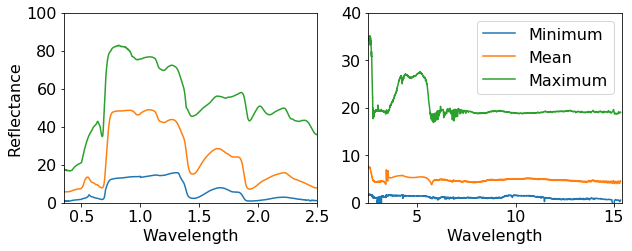

In [3]:
# Plot Vegetation Spectra
font = {'size'   : 16}
plt.rc('font', **font)

plt.figure(num=1, figsize=[10, 3.5])
plt.subplot(1,2,1)
plt.plot(np.arange(0.35, 2.501, 0.001), specASD.min(axis=0))
plt.plot(np.arange(0.35, 2.501, 0.001), specASD.mean(axis=0))
plt.plot(np.arange(0.35, 2.501, 0.001), specASD.max(axis=0))
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.axis([0.35, 2.5, 0, 100])

plt.subplot(1,2,2)
plt.plot(wave[0,:], np.nanmin(specNic, axis=0))
plt.plot(wave[0,:], np.nanmean(specNic, axis=0))
plt.plot(wave[0,:], np.nanmax(specNic, axis=0))
plt.axis([2.5, 15.4, 0, 40])
plt.legend(('Minimum', 'Mean', 'Maximum'))
plt.xlabel('Wavelength')
plt.show()

In [4]:
# Read in NPV spectra
# Read in vegetation spectra
directory = "F:\\Dropbox\\Analysis\\ECOSTRESS Spectral Library\\Input Spectral Library Files\\"

specASD = np.array(np.arange(0.35, 2.5001, 0.001))
specNic = np.array(np.arange(0, 1737, 1))

# Read through ASD spectra files
for file in glob.glob(directory + "*Spectra_ASD.csv"):
    if 'NPV_Misc' in file:
        print(file)
        temp = np.loadtxt(file, delimiter=",", skiprows=1, usecols=np.arange(1,2152))
        specASD = np.vstack((specASD, temp))

# Read through Nicolet spectra files
for file in glob.glob(directory + "*Spectra_Nicolet.csv"):
    if 'NPV_Misc' in file:
        print(file)
        temp = np.loadtxt(file, delimiter=",", skiprows=1, usecols=np.arange(1,1738))
        specNic = np.vstack((specNic, temp))

specASD = np.delete(specASD, 0, 0)
specNic = np.delete(specNic, 0, 0)
specNic[specNic==-9999] = np.nan


F:\Dropbox\Analysis\ECOSTRESS Spectral Library\Input Spectral Library Files\NPV_Misc_Spectra_ASD.csv
F:\Dropbox\Analysis\ECOSTRESS Spectral Library\Input Spectral Library Files\NPV_Misc_Spectra_Nicolet.csv


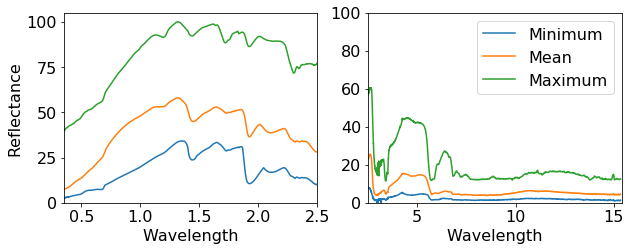

In [5]:
# Plot NPV
font = {'size'   : 16}
plt.rc('font', **font)

plt.figure(num=1, figsize=[10, 3.5])
plt.subplot(1,2,1)
plt.plot(np.arange(0.35, 2.501, 0.001), specASD.min(axis=0))
plt.plot(np.arange(0.35, 2.501, 0.001), specASD.mean(axis=0))
plt.plot(np.arange(0.35, 2.501, 0.001), specASD.max(axis=0))
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.axis([0.35, 2.5, 0, 105])

plt.subplot(1,2,2)
plt.plot(wave[0,:], np.nanmin(specNic, axis=0))
plt.plot(wave[0,:], np.nanmean(specNic, axis=0))
plt.plot(wave[0,:], np.nanmax(specNic, axis=0))
plt.axis([2.5, 15.4, 0, 100])
plt.legend(('Minimum', 'Mean', 'Maximum'))
plt.xlabel('Wavelength')
plt.show()

In [32]:
# Read in vegetation spectra
directory = "F:\\Dropbox\\Analysis\\ECOSTRESS Spectral Library\\Input Spectral Library Files\\"

specASD = np.array(np.arange(0.35, 2.5001, 0.001))
specNic = np.array(np.arange(0, 1737, 1))

# Read through ASD spectra files
for file in glob.glob(directory + "HyspIRI_Spectra_ASD.csv"):
    specASD = np.loadtxt(file, delimiter=",",  usecols=np.arange(1,2152))

# Read through Nicolet spectra files
for file in glob.glob(directory + "HyspIRI_Spectra_Nicolet.csv"):
    wave = np.loadtxt(file, delimiter=",", usecols=np.arange(1,1737))
    specNic = np.loadtxt(file, delimiter=",", usecols=np.arange(1,1737))

for file in glob.glob(directory + 'HyspIRI_Metadata.csv'):
    inFile = open(file, 'r')  # Open ASD spectra file
    meta = inFile.readlines()

for file in glob.glob(directory + 'HyspIRI_Ancillary.csv'):
    inFile = open(file, 'r') 
    anc = inFile.readlines()

specASD = np.delete(specASD, 0, 0)
specNic = np.delete(specNic, 0, 0)
specNic[specNic==-9999] = np.nan

[[  92.     56.11]
 [ 186.     33.33]
 [ 286.     20.95]
 [ 289.     10.12]]


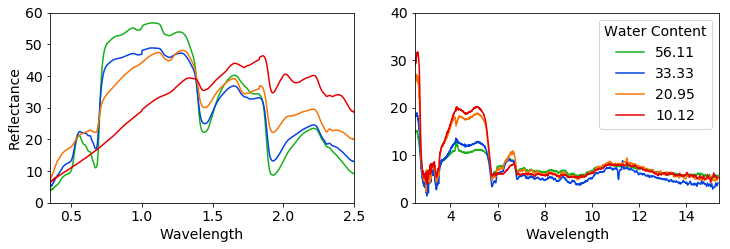

In [75]:
sale = []

for i in range(1, len(anc)):
    line = anc[i].split(',')
    # if 'douglasii' in line[5]:
    if 'VH290' in line[6] or 'VH287' in line[6] or 'VH187' in line[6] or 'VH093' in line[6]:
        chem = line[8].split(';')
        waterstr = chem[-1]
        waternum = str.replace(waterstr, 'Water Content:', '')
        waternum = float(str.replace(waternum, '%', ''))
        sale.append([i-1, waternum])

sale = np.array(sale)
sale[sale[:, 1].argsort()]
print(sale)

# Plot SALE
font = {'size'   : 14}
plt.rc('font', **font)

color = ['xkcd:green', 'xkcd:blue', 'xkcd:orange', 'xkcd:red']  # 'xkcd:lightgreen',
plt.figure(num=1, figsize=[12, 3.5])
plt.subplot(1,2,1)
for a in range(0, len(sale)):
    plt.plot(np.arange(0.35, 2.501, 0.001), specASD[int(sale[a][0]), :], color[a])

plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.axis([0.35, 2.5, 0, 60])

plt.subplot(1,2,2)
for n in range(0, len(sale)):
    plt.plot(wave[0,:], specNic[int(sale[n][0]), :], color[n])

plt.axis([2.5, 15.4, 0, 40])
plt.xlabel('Wavelength')
plt.legend((sale[0][1], sale[1][1], sale[2][1], sale[3][1]), title='Water Content')  # , bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

[[  80.     62.03]
 [ 173.     49.22]
 [ 273.     29.75]
 [ 277.     43.89]]


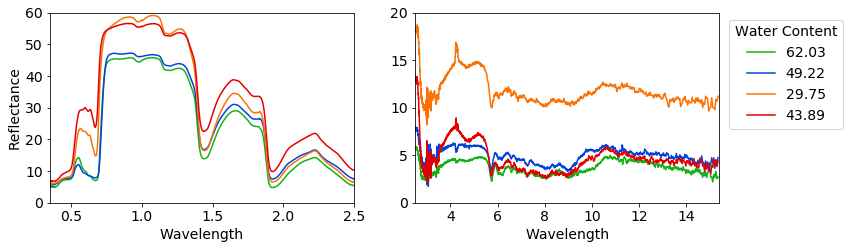

In [91]:
qudo = []

for i in range(1, len(anc)):
    line = anc[i].split(',')
    if 'VH274' in line[6] or 'VH278' in line[6] or 'VH174' in line[6] or 'VH081' in line[6]:
        chem = line[8].split(';')
        waterstr = chem[-1]
        waternum = str.replace(waterstr, 'Water Content:', '')
        waternum = float(str.replace(waternum, '%', ''))
        qudo.append([i-1, waternum])

qudo = np.array(qudo)
qudo[qudo[:, 1].argsort()]
print(qudo)

# Plot QUDO
font = {'size'   : 14}
plt.rc('font', **font)

plt.figure(num=1, figsize=[12, 3.5])
plt.subplot(1,2,1)
for a in range(0, len(qudo)):
    plt.plot(np.arange(0.35, 2.501, 0.001), specASD[int(qudo[a][0]), :], color[a])

plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.axis([0.35, 2.5, 0, 60])

plt.subplot(1,2,2)
for n in range(0, len(qudo)):
    plt.plot(wave[0,:], specNic[int(qudo[n][0]), :], color[n])

plt.axis([2.5, 15.4, 0, 20])
plt.xlabel('Wavelength')
plt.legend((qudo[:, 1]), title = 'Water Content', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()